In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Whale Returns

In [108]:
# Setting Path to the CSV
whale_returns_csv = Path("whale_returns.csv")

In [109]:
# Using file path to read CSV into a DataFrame and displaying a few rows
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
# Setting Date column as index
whale_returns_df.set_index(whale_returns_df['Date'], inplace = True)
# Dropping Date column
whale_returns_df.drop(columns = ['Date'], inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [110]:
# Counting number of nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [111]:
# Dropping nulls and displaying a few rows
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

In [112]:
# Setting Path to the CSV
algo_returns_csv = Path("algo_returns.csv")

In [113]:
# Using file path to read CSV into a DataFrame and displaying a few rows
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace = True)
algo_returns_df.drop(columns = ['Date'], inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [114]:
# Counting number of nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [115]:
# Dropping nulls and displaying a few rows
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

In [116]:
# Setting Path to the CSV
sp500_returns_csv = Path("sp500_history.csv")

In [117]:
# Using file path to read CSV into a DataFrame and displaying a few rows
sp500_returns_df = pd.read_csv(sp500_returns_csv)
sp500_returns_df['Date'] = pd.to_datetime(sp500_returns_df["Date"], dayfirst = True)
sp500_returns_df.set_index(sp500_returns_df['Date'], inplace = True)
sp500_returns_df.drop(columns = ['Date'], inplace = True)
sp500_returns_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [118]:
# Checking Data Types
sp500_returns_df.dtypes

Close    object
dtype: object

In [119]:
# Fixing Data Types.Replacing the $. Turning Close column into float
sp500_returns_df['Close'] = sp500_returns_df['Close'].str.replace('$','')
sp500_returns_df['Close'] = sp500_returns_df['Close'].astype('float')
#Sorting index
sp500_returns_df.sort_index(inplace=True)
sp500_returns_df.head()

C:\Users\WESLEY~1\AppData\Local\Temp/ipykernel_22188/1009150128.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_returns_df['Close'] = sp500_returns_df['Close'].str.replace('$','')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [120]:
# Checking if Close column is now a float
sp500_returns_df['Close'].dtype

dtype('float64')

In [121]:
# Calculate the daily return using the 'pct_change()' function
sp500_daily_returns = sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Drop Nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [122]:
# Rename column by using .rename
sp500_daily_returns = sp500_daily_returns.rename(columns = {"Close":"S&P500"})
sp500_daily_returns.head()

,S&P500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [123]:
# Concatenate the two DataFrames by columns and perform an inner join
mixed_portfolios_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join = "inner")
mixed_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


## Performance Analysis

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

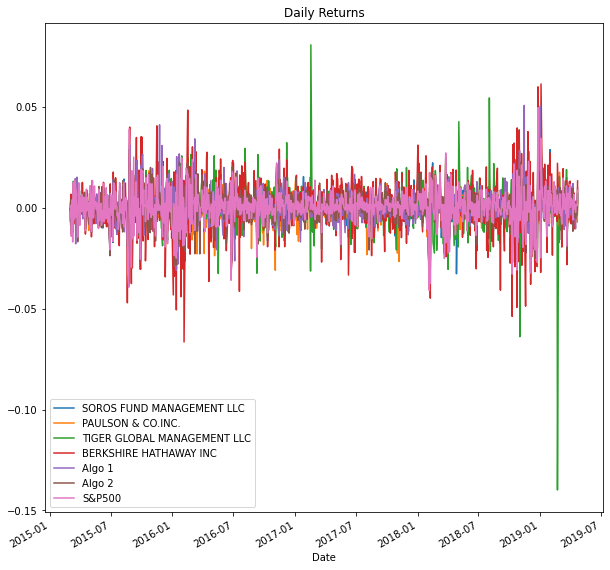

In [124]:
# Plot daily returns of all portfolios
mixed_portfolios_df.plot(figsize = (10, 10), title= "Daily Returns")

In [125]:
# Calculate cumulative returns of all portfolios. # Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + mixed_portfolios_df).cumprod()-1
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928
...,...,...,...,...,...,...,...
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,0.372945
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,0.369823
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,0.371986


<AxesSubplot:title={'center':'Cumulative Returns of mixed portfolios'}, xlabel='Date'>

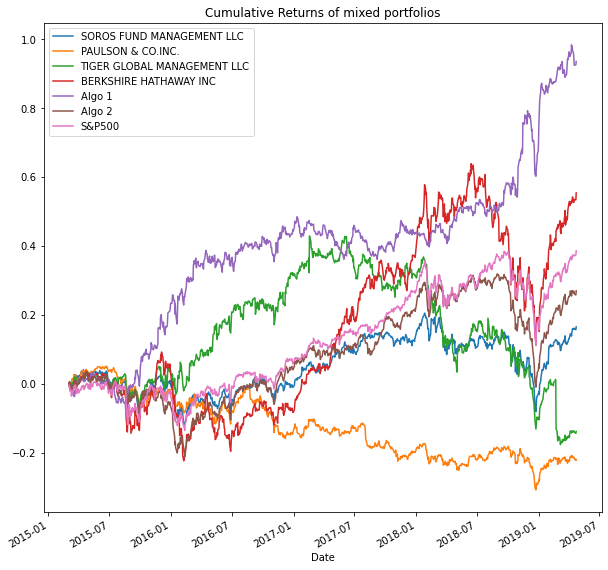

In [126]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,10), title="Cumulative Returns of mixed portfolios")

## Risk Analysis

<AxesSubplot:title={'center':'Risk Analysis'}>

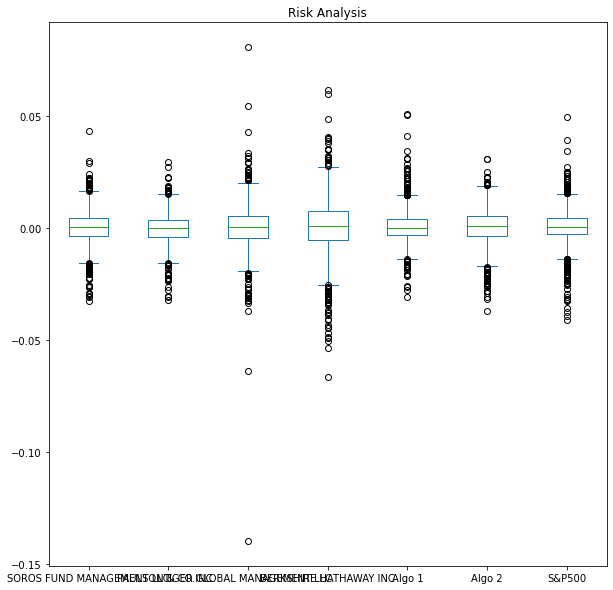

In [127]:
# Box plot to visually show risk
mixed_portfolios_df.plot.box(figsize=(10,10), title="Risk Analysis")

In [128]:
# Calculate the daily standard deviations of all portfolios
daily_std = mixed_portfolios_df.std().sort_values(ascending=True)
daily_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

## Determine which portfolios are riskier than the S&P 500

In [129]:
# Calculate  the daily standard deviation of S&P 500
daily_std['S&P500']  

0.008553731597758204

In [130]:
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = [daily_std > daily_std['S&P500']]
riskier_portfolios

[PAULSON & CO.INC.              False
 Algo 1                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 2                         False
 S&P500                         False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 dtype: bool]

In [131]:
# Calculate the annualized standard deviation (252 trading day) Use np.sqrt to multiply by the days
annual_std = daily_std * np.sqrt(252)
annual_std.sort_values(ascending=True)
annual_std


PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling std'}, xlabel='Date'>

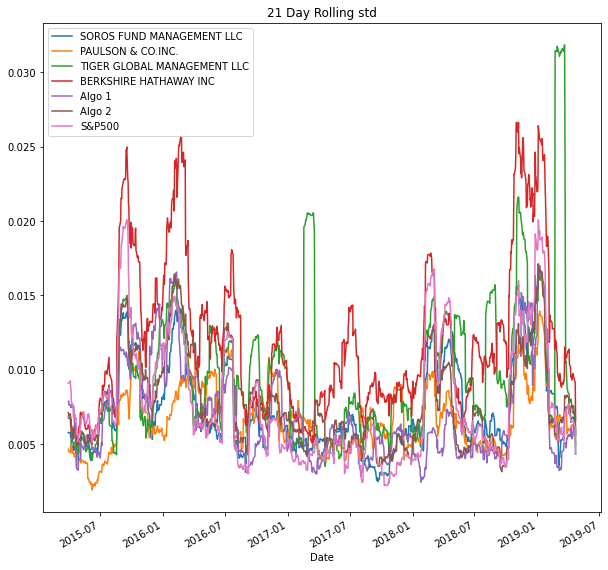

In [132]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = mixed_portfolios_df.rolling(window=21).std().plot(figsize=(10,10), title="21 Day Rolling std") 
# Plot the rolling standard deviation
rolling_std

In [133]:
# Calculate the correlation
price_correlation = mixed_portfolios_df.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

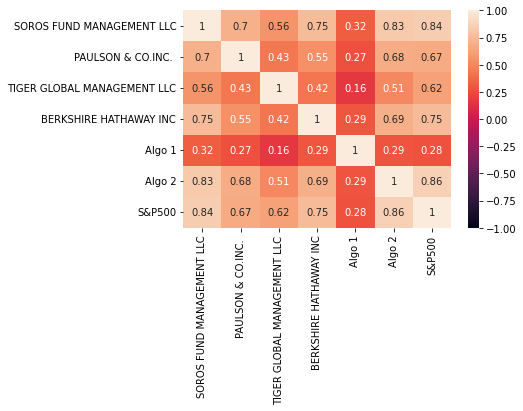

In [134]:
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1, annot = True)

In [135]:
# Calculate covariance of a single portfolio
algo1_covariance = mixed_portfolios_df['Algo 1'].rolling(window=30).cov(mixed_portfolios_df['S&P500'])
algo1_covariance

Date
2015-03-03             NaN
2015-03-04             NaN
2015-03-05             NaN
2015-03-06             NaN
2015-03-09             NaN
                  ...     
2019-04-16   -1.256756e-06
2019-04-17   -4.926824e-07
2019-04-18   -1.086303e-06
2019-04-22   -1.281288e-07
2019-04-23    1.053167e-06
Length: 1043, dtype: float64

In [136]:
# Calculate variance of the S&P 500. Add rolling function to match covariance calculation.
SP500_variance = mixed_portfolios_df['S&P500'].rolling(window=30).var()
SP500_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000043
2019-04-17    0.000041
2019-04-18    0.000038
2019-04-22    0.000037
2019-04-23    0.000033
Name: S&P500, Length: 1043, dtype: float64

In [137]:
# Computing beta
algo1_beta = algo1_covariance/SP500_variance

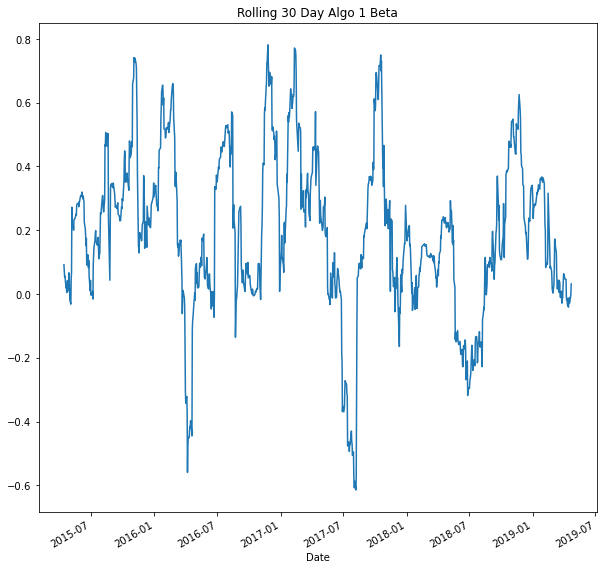

In [138]:
# Plot beta trend
algo1_beta_plot = algo1_beta.plot(figsize=(10,10), title='Rolling 30 Day Algo 1 Beta')

### Rolling Statistics Challenge: Exponentially Weighted Average

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

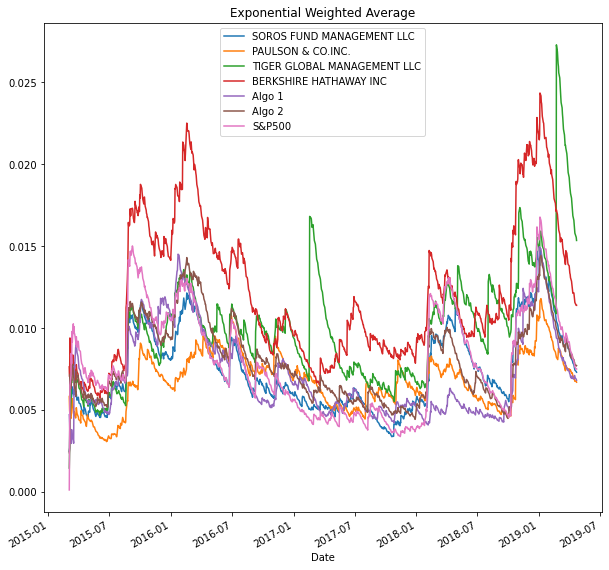

In [139]:
# Use `ewm` to calculate the rolling window
ewm_rolling_window = mixed_portfolios_df.ewm(halflife=21, adjust=True).std().plot(figsize=(10,10))
plt.title('Exponential Weighted Average')
ewm_rolling_window

# Sharpe Ratios
'Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot'

In [140]:
# Annualized Sharpe Ratios (252 Trading Days) df.mean()/df.std()
Sharpe_Ratio = (mixed_portfolios_df.mean()*252)/(mixed_portfolios_df.std() * np.sqrt(252))
Sharpe_Ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

Text(0.5, 1.0, 'Sharpe Ratio')

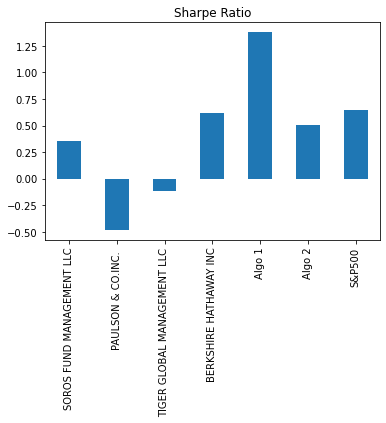

In [141]:
# Visualize the sharpe ratios as a bar plot
Sharpe_Ratio.plot(kind="bar")
plt.title("Sharpe Ratio")

# Create Custom Portfolio

In [142]:
# reading data from 1st stock
apple_returns_csv = Path('AAPL.csv')
apple_returns_df = pd.read_csv(apple_returns_csv)
apple_returns_df['Date']=pd.to_datetime(apple_returns_df["Date"], dayfirst = True)
apple_returns_df.set_index(apple_returns_df['Date'], inplace=True)
apple_returns_df.drop(columns=['Date','Open','High','Low','Adj Close','Volume'], inplace=True)
apple_returns_df=apple_returns_df.rename(columns={"Close":"Apple Daily Close Price"})
apple_returns_df.head()

,Apple Daily Close Price
Date,
2020-09-23,107.120003
2020-09-24,108.220001
2020-09-25,112.279999
2020-09-28,114.959999
2020-09-29,114.089996


In [143]:
# Reading data from 2nd stock
Cost_returns_csv = Path('COST.csv')
Cost_returns_df = pd.read_csv(Cost_returns_csv)
Cost_returns_df['Date']=pd.to_datetime(Cost_returns_df["Date"], dayfirst = True)
Cost_returns_df.set_index(Cost_returns_df['Date'], inplace=True)
Cost_returns_df.drop(columns=['Date','Open','High','Low','Adj Close','Volume'], inplace=True)
Cost_returns_df=Cost_returns_df.rename(columns={"Close":"Costco Daily Close Price"})
Cost_returns_df.head()

,Costco Daily Close Price
Date,
2020-09-23,344.630005
2020-09-24,347.000000
2020-09-25,342.579987
2020-09-28,349.619995
2020-09-29,352.140015


In [144]:
# Reading and cleaning data from 3rd stock
google_returns_csv = Path('GOOG.csv')
google_returns_df = pd.read_csv(google_returns_csv)
google_returns_df['Date']=pd.to_datetime(google_returns_df["Date"], dayfirst = True)
google_returns_df.set_index(google_returns_df['Date'], inplace=True)
google_returns_df.drop(columns=['Date','Open','High','Low','Adj Close','Volume'], inplace=True)
google_returns_df=google_returns_df.rename(columns={"Close":"Google Daily Close Price"})
google_returns_df.head()

,Google Daily Close Price
Date,
2020-09-23,1415.209961
2020-09-24,1428.290039
2020-09-25,1444.959961
2020-09-28,1464.520020
2020-09-29,1469.329956


In [145]:
Cost_returns_df

,Costco Daily Close Price
Date,
2020-09-23,344.630005
2020-09-24,347.000000
2020-09-25,342.579987
2020-09-28,349.619995
2020-09-29,352.140015
...,...
2021-09-16,463.309998
2021-09-17,459.510010
2021-09-20,451.140015


In [146]:
# Combine all stocks in a single DataFrame
combined_portfolios_df = pd.concat([google_returns_df,Cost_returns_df, apple_returns_df], axis='columns', join='inner')
combined_portfolios_df.head()

,Google Daily Close Price,Costco Daily Close Price,Apple Daily Close Price
Date,,,
2020-09-23,1415.209961,344.630005,107.120003
2020-09-24,1428.290039,347.000000,108.220001
2020-09-25,1444.959961,342.579987,112.279999
2020-09-28,1464.520020,349.619995,114.959999
2020-09-29,1469.329956,352.140015,114.089996


In [147]:
# Calculate daily returns, Drop NAs, Display sample data
apple_returns_df.isnull().sum()
apple_dailyreturns_df=apple_returns_df.pct_change()
apple_dailyreturns_df.dropna(inplace=True)
apple_dailyreturns_df.head()

,Apple Daily Close Price
Date,
2020-09-24,0.010269
2020-09-25,0.037516
2020-09-28,0.023869
2020-09-29,-0.007568
2020-09-30,0.015076


In [148]:
Cost_returns_df.isnull().sum()
Cost_dailyreturns_df=Cost_returns_df.pct_change()
Cost_dailyreturns_df.dropna(inplace=True)
Cost_dailyreturns_df.head()

,Costco Daily Close Price
Date,
2020-09-24,0.006877
2020-09-25,-0.012738
2020-09-28,0.020550
2020-09-29,0.007208
2020-09-30,0.008122


In [149]:
google_returns_df.isnull().sum()
google_dailyreturns_df=google_returns_df.pct_change()
google_dailyreturns_df.dropna(inplace=True)
google_dailyreturns_df.head()

,Google Daily Close Price
Date,
2020-09-24,0.009242
2020-09-25,0.011671
2020-09-28,0.013537
2020-09-29,0.003284
2020-09-30,0.000184


In [150]:
combined_portfolios_df.isnull().sum()
daily_returns_df = combined_portfolios_df.pct_change()
daily_returns_df.dropna(inplace=True)
daily_returns.head()

,Google Daily Close Price,Costco Daily Close Price,Apple Daily Close Price
Date,,,
2020-09-23,NaN,NaN,NaN
2020-09-24,0.009242,0.006877,0.010269
2020-09-25,0.011671,-0.012738,0.037516
2020-09-28,0.013537,0.020550,0.023869
2020-09-29,0.003284,0.007208,-0.007568



# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [151]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = daily_returns_df.dot(weights)
portfolio_returns.head()
# Display sample data

Date
2020-09-24    0.008796
2020-09-25    0.012150
2020-09-28    0.019319
2020-09-29    0.000975
2020-09-30    0.007794
dtype: float64

In [152]:
daily_std_2 = combined_portfolios_df.std().sort_values(ascending=True)
daily_std_2

Apple Daily Close Price      11.450798
Costco Daily Close Price     35.489562
Google Daily Close Price    428.586386
dtype: float64

In [153]:
annual_std_2 = daily_std_2 * np.sqrt(252)
annual_std_2.sort_values(ascending=True)
annual_std_2

Apple Daily Close Price      181.775779
Costco Daily Close Price     563.379324
Google Daily Close Price    6803.597963
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling std'}, xlabel='Date'>

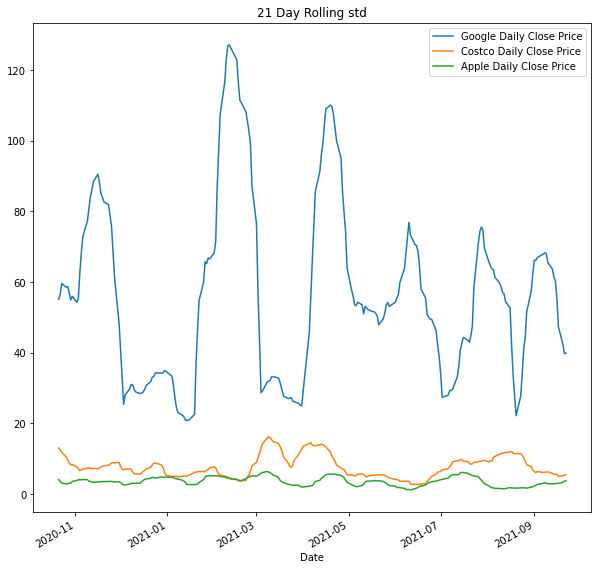

In [154]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_2 = combined_portfolios_df.rolling(window=21).std().plot(figsize=(10,10), title="21 Day Rolling std") 
# Plot the rolling standard deviation
rolling_std_2

In [155]:
# Calculate the correlation
price_correlation_2 = combined_portfolios_df.corr()
price_correlation_2

,Google Daily Close Price,Costco Daily Close Price,Apple Daily Close Price
Google Daily Close Price,1.000000,0.723508,0.823725
Costco Daily Close Price,0.723508,1.000000,0.754528
Apple Daily Close Price,0.823725,0.754528,1.000000


<AxesSubplot:>

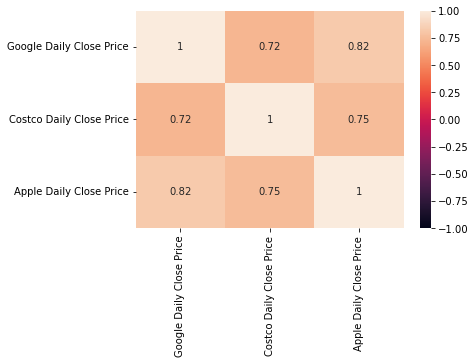

In [156]:
sns.heatmap(price_correlation_2, vmin=-1, vmax=1, annot = True)